## Lg헬로비전 해지스코어링 데이터 전처리 - 1
- 전체 정보 확인 및 null 값 확인
- null 값 제거

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import operator
import math
import warnings
import openpyxl
import random
warnings.filterwarnings('ignore')

In [2]:
# 한글 글꼴체 변경
plt.rcParams['font.family'] ='Malgun Gothic'
# df.head() 이런거 했을 때, 컬럼이 생략되지 않고, 모든 컬럼 뜨게
pd.set_option('display.max_columns', None)
# 지수 표기법 대신에 소수점으로 표시하는코드
pd.options.display.float_format = '{:.2f}'.format
# 값 길이 제한 X
pd.set_option('display.max_colwidth', None) # 값 길이 제한 없음

#### 전체 데이터 불러오기

In [4]:
# 필자는 src가 jupyternotebook 경로이다.
# 그래서, src -> data -> full_data -> TPS_cancel_202302_202312.csv 가 파일 경로이다.

df = pd.read_csv("data/full_data/TPS_cancel_202302_202312.csv")

In [5]:
# 샘플 데이터 확인
df.head(10)

,sha2_hash,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,TV_SCRB,ANALOG_SCRB,DIGITAL_SCRB,TOTAL_INTERNET_SCRB,GIGA_INTERNET_SCRB,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_25_RATIO_MONTH1,CH_25_RATIO_MEAN_3MM,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,p_mt
0,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,12개월~24개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,10.0,약정만료전 12개월이상,20240325,733,2.00,0.00,2.00,1.00,1.00,Y,Y,N,3.00,3개월내없음,N,N,60대,수신,수신,0.00,0.00,0.00,기타,0.00,N,N,202302
1,20e29fd0dfd70049eba4ad53988a0d25f378df4a819fa0880ac4df0a7fbfa667,36개월 이상,HD,프리미엄,N,N,재약정,N,0건,0건,O/B,10.0,약정만료전 12개월이상,20240817,2007,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,N,N,60대,수신,수신,1.46,0.27,0.27,기타,0.00,N,N,202302
2,20e2a2955092212806dfe047b6219d71cb7caa146d7d82fb857fcff9bbdae788,24개월~ 36개월미만,UHD,베이직,N,N,약정승계,N,0건,0건,일반상담,60.0,약정만료전 1개월,20230304,3127,2.00,1.00,1.00,0.00,0.00,N,N,Y,2.00,일주일내,N,N,70대,수신,수신,12.13,3.40,3.40,YTN,3.00,N,N,202302
3,9de417ddb34396c64ad71a428d4054f6456d6b2cab01537c02680db75347d5ce,36개월 이상,HD,이코노미,N,Y,재약정,N,0건,0건,일반상담,0.0,약정만료전 12개월이상,20251106,2853,4.00,0.00,4.00,1.00,0.00,Y,N,N,5.00,3개월내없음,N,N,50대,수신,수신,0.00,0.00,0.00,기타,0.00,N,N,202302
4,9de4156490e581b5c5761a47bbf362e8a1190c47cfad4cd5507c2bca9e9d1f58,24개월~ 36개월미만,HD,이코노미,N,Y,신규,N,0건,0건,현장경로,0.0,약정만료전 3~6개월,20230607,995,3.00,0.00,3.00,2.00,2.00,Y,Y,N,5.00,일주일전,Y,N,30대,전체거부,수신,0.29,2.51,2.51,기타,0.00,N,N,202302
5,9de40aa0e1dd83ca6134292a5ea326ed0c038a27bdda69a9591cf6a149b3c73e,36개월 이상,UHD,프리미엄,N,N,재약정,N,0건,0건,O/B,40.0,약정만료전 12개월이상,20251026,5109,2.00,0.00,2.00,0.00,0.00,N,N,N,2.00,일주일내,N,N,50대,수신,수신,7.58,0.43,0.43,기타,1.00,N,N,202302
6,20e2a65a6d2b2e568f99d6f09672d31c6e5c0f6fc6d23c0a969511b62101e18c,36개월 이상,HD,베이직,N,Y,재약정,N,1건,0건,I/B,10.0,약정만료전 12개월이상,20250428,3564,2.00,0.00,2.00,1.00,0.00,Y,N,N,3.00,일주일내,N,N,70대,수신,수신,1.46,0.00,0.00,기타,0.00,N,N,202302
7,9de407eaaed65f8054d55471545b8125b3dd2ec6a7a0c33965272e93cfdd3e3d,6개월~12개월미만,UHD,베이직,N,N,신규,N,0건,1건,O/B,40.0,약정만료전 12개월이상,20260717,225,1.00,0.00,1.00,1.00,1.00,Y,Y,N,2.00,일주일내,N,N,20대,전체거부,전체거부,6.99,0.45,0.45,기타,0.00,Y,Y,202302
8,9de406de0f2c21b1cdb4797e8de7ffda063fb1c40f5477e61b61c934ec8635c9,24개월~ 36개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,40.0,약정만료전 6~9개월,20231012,3356,2.00,0.00,2.00,0.00,0.00,N,N,N,2.00,일주일내,N,N,50대,수신,수신,6.17,9.54,9.54,기타,1.00,N,N,202302
9,9de421090c9df93c9b7507b9c1b0ed1cd6757c420c0b74e866d74caaa58b721d,36개월 이상,HD,베이직,N,N,재약정,N,0건,0건,O/B,40.0,약정만료전 3~6개월,20230804,3078,3.00,0.00,3.00,1.00,1.00,Y,Y,N,4.00,일주일내,N,N,60대,수신,수신,7.45,2.11,2.11,기타,0.00,N,N,202302


In [6]:
# 데이터프레임 크기 확인
df.shape

(22476058, 38)

In [5]:
# 기본 정보 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22476058 entries, 0 to 22476057
Data columns (total 38 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   sha2_hash                  object 
 1   SVC_USE_DAYS_GRP           object 
 2   MEDIA_NM_GRP               object 
 3   PROD_NM_GRP                object 
 4   PROD_OLD_YN                object 
 5   PROD_ONE_PLUS_YN           object 
 6   AGMT_KIND_NM               object 
 7   STB_RES_1M_YN              object 
 8   SVOD_SCRB_CNT_GRP          object 
 9   PAID_CHNL_CNT_GRP          object 
 10  SCRB_PATH_NM_GRP           object 
 11  INHOME_RATE                object 
 12  AGMT_END_SEG               object 
 13  AGMT_END_YMD               object 
 14  TOTAL_USED_DAYS            int64  
 15  TV_SCRB                    float64
 16  ANALOG_SCRB                float64
 17  DIGITAL_SCRB               float64
 18  TOTAL_INTERNET_SCRB        float64
 19  GIGA_INTERNET_SCRB         float64
 20  

In [6]:
df.describe()

,TOTAL_USED_DAYS,TV_SCRB,ANALOG_SCRB,DIGITAL_SCRB,TOTAL_INTERNET_SCRB,GIGA_INTERNET_SCRB,TV_I_CNT,CH_HH_AVG_MONTH1,CH_25_RATIO_MONTH1,CH_25_RATIO_MEAN_3MM,KIDS_USE_PV_MONTH1,p_mt
count,22476058.00,22476025.00,22476025.00,22476025.00,22476025.00,22476025.00,22476025.00,22476058.00,22476058.00,22476058.00,22476058.00,22476058.00
mean,2760.33,1.78,0.02,1.76,0.50,0.13,2.28,4.55,2.41,2.41,0.40,202306.99
std,1219.27,2.81,0.18,2.80,1.03,0.36,3.43,4.11,5.29,5.29,4.45,3.16
min,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,202302.00
25%,2095.00,1.00,0.00,1.00,0.00,0.00,1.00,1.16,0.00,0.00,0.00,202304.00
50%,2920.00,2.00,0.00,1.00,0.00,0.00,2.00,3.62,0.83,0.83,0.00,202307.00
75%,3648.00,2.00,0.00,2.00,1.00,0.00,3.00,7.03,2.89,2.89,0.00,202310.00
max,45289.00,235.00,29.00,235.00,102.00,21.00,275.00,35.39,128.87,100.00,4621.00,202312.00


In [12]:
# 컬럼 확인

df.columns

Index(['sha2_hash', 'SVC_USE_DAYS_GRP', 'MEDIA_NM_GRP', 'PROD_NM_GRP',
       'PROD_OLD_YN', 'PROD_ONE_PLUS_YN', 'AGMT_KIND_NM', 'STB_RES_1M_YN',
       'SVOD_SCRB_CNT_GRP', 'PAID_CHNL_CNT_GRP', 'SCRB_PATH_NM_GRP',
       'INHOME_RATE', 'AGMT_END_SEG', 'AGMT_END_YMD', 'TOTAL_USED_DAYS',
       'TV_SCRB', 'ANALOG_SCRB', 'DIGITAL_SCRB', 'TOTAL_INTERNET_SCRB',
       'GIGA_INTERNET_SCRB', 'BUNDLE_YN', 'DIGITAL_GIGA_YN', 'DIGITAL_ALOG_YN',
       'TV_I_CNT', 'CH_LAST_DAYS_BF_GRP', 'VOC_TOTAL_MONTH1_YN',
       'VOC_STOP_CANCEL_MONTH1_YN', 'AGE_GRP10', 'EMAIL_RECV_CLS_NM',
       'SMS_SEND_CLS_NM', 'CH_HH_AVG_MONTH1', 'CH_25_RATIO_MONTH1',
       'CH_25_RATIO_MEAN_3MM', 'CH_FAV_RNK1', 'KIDS_USE_PV_MONTH1',
       'NFX_USE_YN', 'YTB_USE_YN'],
      dtype='object')

In [8]:
# 결측치 개수 확인
df.isnull().sum()

sha2_hash                     0
SVC_USE_DAYS_GRP              0
MEDIA_NM_GRP                  0
PROD_NM_GRP                   0
PROD_OLD_YN                   0
PROD_ONE_PLUS_YN              0
AGMT_KIND_NM                  0
STB_RES_1M_YN                33
SVOD_SCRB_CNT_GRP             0
PAID_CHNL_CNT_GRP             0
SCRB_PATH_NM_GRP              0
INHOME_RATE                  33
AGMT_END_SEG                  0
AGMT_END_YMD                  0
TOTAL_USED_DAYS               0
TV_SCRB                      33
ANALOG_SCRB                  33
DIGITAL_SCRB                 33
TOTAL_INTERNET_SCRB          33
GIGA_INTERNET_SCRB           33
BUNDLE_YN                     0
DIGITAL_GIGA_YN               0
DIGITAL_ALOG_YN               0
TV_I_CNT                     33
CH_LAST_DAYS_BF_GRP           0
VOC_TOTAL_MONTH1_YN           0
VOC_STOP_CANCEL_MONTH1_YN     0
AGE_GRP10                    33
EMAIL_RECV_CLS_NM             0
SMS_SEND_CLS_NM               0
CH_HH_AVG_MONTH1              0
CH_25_RA

### null 값을 가진 행 확인

In [12]:
df[df.isnull().any(axis=1)].sort_values(by=['sha2_hash', 'p_mt'], ascending=[True, True])

,sha2_hash,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,TV_SCRB,ANALOG_SCRB,DIGITAL_SCRB,TOTAL_INTERNET_SCRB,GIGA_INTERNET_SCRB,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_25_RATIO_MONTH1,CH_25_RATIO_MEAN_3MM,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,p_mt
1901009,07986f40d95a5b0ee967be782e212dc73cd223a231c0a43928674734562761e8,36개월 이상,기타,기타,N,N,정보없음,NaN,기타,기타,정보없음,NaN,기타,정보없음,2955,NaN,NaN,NaN,NaN,NaN,N,N,N,NaN,3개월내없음,N,N,NaN,정보없음,정보없음,0.00,0.00,0.00,기타,0.00,N,N,202302
3456505,07986f40d95a5b0ee967be782e212dc73cd223a231c0a43928674734562761e8,36개월 이상,기타,기타,N,N,정보없음,NaN,기타,기타,정보없음,NaN,기타,정보없음,2986,NaN,NaN,NaN,NaN,NaN,N,N,N,NaN,3개월내없음,N,N,NaN,정보없음,정보없음,0.00,0.00,0.00,기타,0.00,N,N,202303
4162115,07986f40d95a5b0ee967be782e212dc73cd223a231c0a43928674734562761e8,36개월 이상,기타,기타,N,N,정보없음,NaN,기타,기타,정보없음,NaN,기타,정보없음,3016,NaN,NaN,NaN,NaN,NaN,N,N,N,NaN,3개월내없음,N,N,NaN,정보없음,정보없음,0.00,0.00,0.00,기타,0.00,N,N,202304
7976351,07986f40d95a5b0ee967be782e212dc73cd223a231c0a43928674734562761e8,36개월 이상,기타,기타,N,N,정보없음,NaN,기타,기타,정보없음,NaN,기타,정보없음,3047,NaN,NaN,NaN,NaN,NaN,N,N,N,NaN,3개월내없음,N,N,NaN,정보없음,정보없음,0.00,0.00,0.00,기타,0.00,N,N,202305
10153094,07986f40d95a5b0ee967be782e212dc73cd223a231c0a43928674734562761e8,36개월 이상,기타,기타,N,N,정보없음,NaN,기타,기타,정보없음,NaN,기타,정보없음,3077,NaN,NaN,NaN,NaN,NaN,N,N,N,NaN,3개월내없음,N,N,NaN,정보없음,정보없음,0.00,0.00,0.00,기타,0.00,N,N,202306
11504455,07986f40d95a5b0ee967be782e212dc73cd223a231c0a43928674734562761e8,36개월 이상,기타,기타,N,N,정보없음,NaN,기타,기타,정보없음,NaN,기타,정보없음,3108,NaN,NaN,NaN,NaN,NaN,N,N,N,NaN,3개월내없음,N,N,NaN,정보없음,정보없음,0.00,0.00,0.00,기타,0.00,N,N,202307
13666593,07986f40d95a5b0ee967be782e212dc73cd223a231c0a43928674734562761e8,36개월 이상,기타,기타,N,N,정보없음,NaN,기타,기타,정보없음,NaN,기타,정보없음,3139,NaN,NaN,NaN,NaN,NaN,N,N,N,NaN,3개월내없음,N,N,NaN,정보없음,정보없음,0.00,0.00,0.00,기타,0.00,N,N,202308
14667403,07986f40d95a5b0ee967be782e212dc73cd223a231c0a43928674734562761e8,36개월 이상,기타,기타,N,N,정보없음,NaN,기타,기타,정보없음,NaN,기타,정보없음,3169,NaN,NaN,NaN,NaN,NaN,N,N,N,NaN,3개월내없음,N,N,NaN,정보없음,정보없음,0.00,0.00,0.00,기타,0.00,N,N,202309
16368410,07986f40d95a5b0ee967be782e212dc73cd223a231c0a43928674734562761e8,36개월 이상,기타,기타,N,N,정보없음,NaN,기타,기타,정보없음,NaN,기타,정보없음,3200,NaN,NaN,NaN,NaN,NaN,N,N,N,NaN,3개월내없음,N,N,NaN,정보없음,정보없음,0.00,0.00,0.00,기타,0.00,N,N,202310
19744344,07986f40d95a5b0ee967be782e212dc73cd223a231c0a43928674734562761e8,36개월 이상,기타,기타,N,N,정보없음,NaN,기타,기타,정보없음,NaN,기타,정보없음,3230,NaN,NaN,NaN,NaN,NaN,N,N,N,NaN,3개월내없음,N,N,NaN,정보없음,정보없음,0.00,0.00,0.00,기타,0.00,N,N,202311


### 📋 null 값 가진 행 제거
1. 특정 sha2_hash 값들이 반복됨
    - 0798~~, d3965~~, d8073e~~ 라는 세 sha2_hash가 각각 11번씩 반복되어 총 33개의 행이 데이터에 포함됨.
2. 연속형 컬럼은 대부분 null 값을 가지고, 범주형 컬럼은 기타, 정보없음, N 같은 유의미하지 않은 값들을 가짐.
3. 데이터의 신뢰도를 떨어뜨릴 가능성이 높을 것 같음.
    - null 값이 대부분이면 데이터 분석 및 모델링 시, 해당 연속형 행들은 분석에 기여하지 못함.
4. 그리고 2월부터 12월까지 있으므로 해지하지 않은 고객이라 판단하여, 33개 행을 제거하기로 결정.

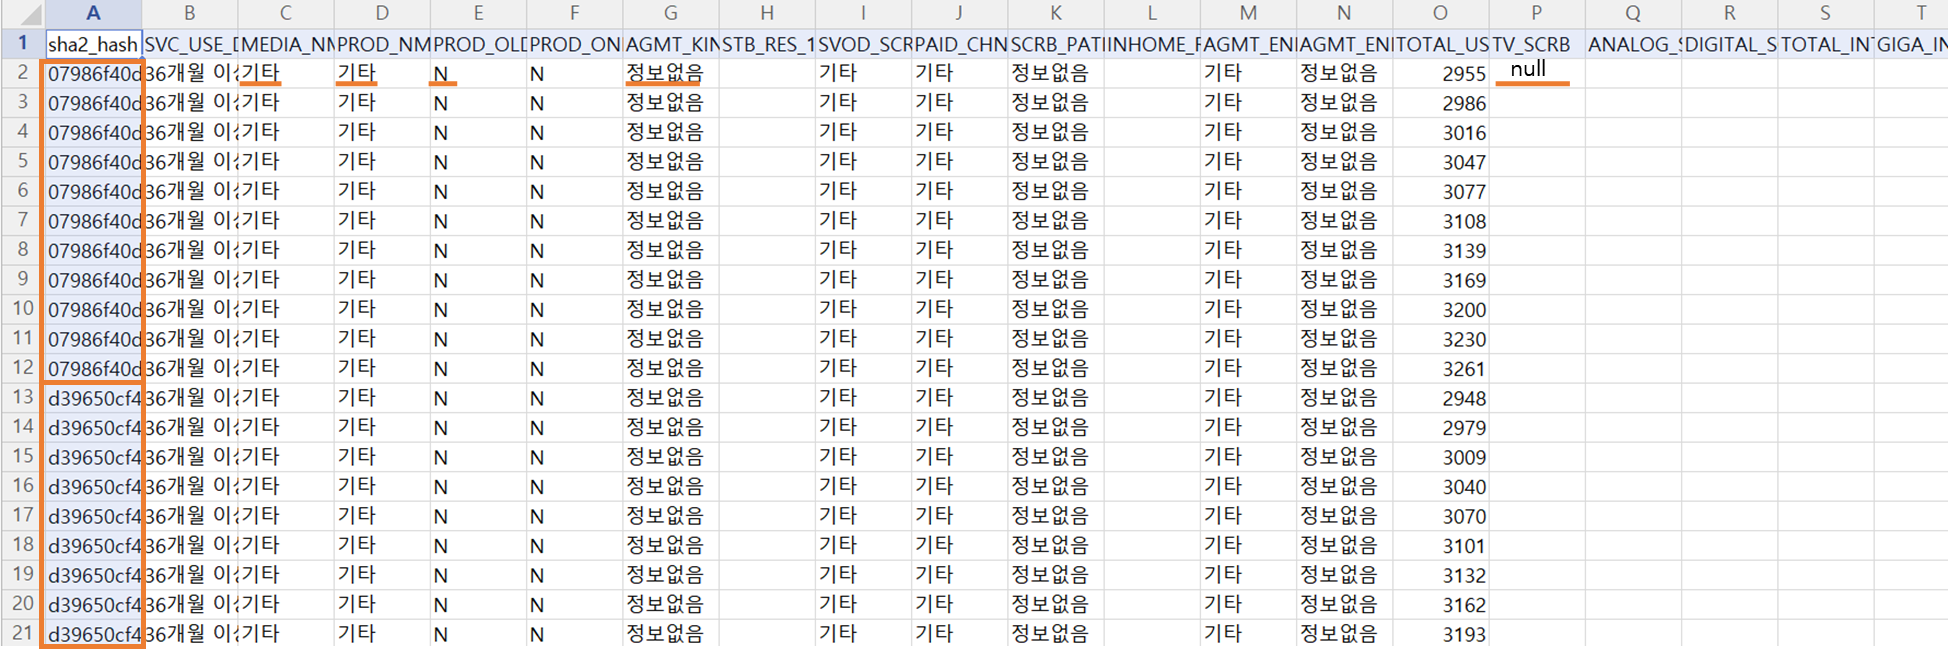

In [7]:
# null 값 제거 후, 확인
df = df.dropna()

In [9]:
# 확인
df[df.isnull().any(axis=1)].sort_values(by=['sha2_hash', 'p_mt'], ascending=[True, True])

,sha2_hash,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,TV_SCRB,ANALOG_SCRB,DIGITAL_SCRB,TOTAL_INTERNET_SCRB,GIGA_INTERNET_SCRB,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_25_RATIO_MONTH1,CH_25_RATIO_MEAN_3MM,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,p_mt


In [11]:
# null 값 제거 한 데이터 저장
df.to_csv("data/full_data/TPS_cancel_data_preprocessing1.csv", index=False)